In [1]:
from sklearn.svm import OneClassSVM
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

data_path = r'C:\Users\name\OneDrive\Documents\Computer Science Masters\Independent Research Project\Summative Assessment\Artefact Directory\cnp_train_data.xlsx'
df_normal = pd.read_excel(data_path,sheet_name='Train')
X = df_normal.drop(['target'], axis=1)
scaler = MinMaxScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

OC_svm = OneClassSVM(gamma='auto', kernel='rbf', nu=0.01)
OC_svm.fit(scaled_X)

OneClassSVM(gamma='auto', nu=0.01)

In [2]:
data_path_test = r'C:\Users\name\OneDrive\Documents\Computer Science Masters\Independent Research Project\Summative Assessment\Artefact Directory\cnp_validation_data.xlsx'
df_hasanomalies = pd.read_excel(data_path_test,sheet_name='Validation')
X_test = df_hasanomalies.drop(['target'], axis=1)

scaled_X_test = scaler.transform(X_test)

pred = OC_svm.predict(scaled_X_test)
pred = [1 if i==-1 else 0 for i in pred]
print(classification_report(df_hasanomalies['target'], pred))

              precision    recall  f1-score   support

           0       0.96      0.60      0.74      2324
           1       0.04      0.43      0.07        91

    accuracy                           0.59      2415
   macro avg       0.50      0.51      0.41      2415
weighted avg       0.93      0.59      0.71      2415



              precision    recall  f1-score   support

           0       0.97      0.68      0.80      2324
           1       0.05      0.43      0.09        91

    accuracy                           0.67      2415
   macro avg       0.51      0.56      0.45      2415
weighted avg       0.93      0.67      0.78      2415



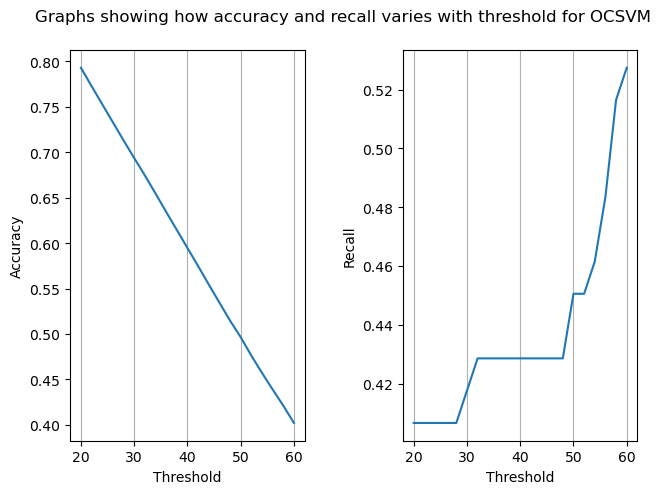

In [3]:
# step 6 in https://grabngoinfo.com/one-class-support-vector-machine-svm-for-anomaly-detection/
# to vary OCSVM threshold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score,accuracy_score

score = OC_svm.score_samples(scaled_X_test)
score_threshold = np.percentile(score, 32)
custom_threshold_prediction = [1 if i < score_threshold else 0 for i in score]
print(classification_report(df_hasanomalies['target'], custom_threshold_prediction))

accuracy_recall = []

for i in range(0,21,1):
    score_threshold = np.percentile(score, 20+(2*i))
    custom_threshold_prediction = [1 if i < score_threshold else 0 for i in score]

    accuracy = accuracy_score(df_hasanomalies['target'], custom_threshold_prediction)
    recall = recall_score(df_hasanomalies['target'], custom_threshold_prediction)

    accuracy_recall.append([accuracy,recall])

x = list(range(20,62,2))
y = accuracy_recall

figure, axis = plt.subplots(1, 2)
figure.suptitle("Graphs showing how accuracy and recall varies with threshold for OCSVM")
figure.tight_layout(w_pad=4.0)
axis[0].plot(x,[pt[0] for pt in y])
axis[0].grid(axis = 'x')
axis[0].set(xlabel="Threshold",ylabel="Accuracy")
axis[1].plot(x,[pt[1] for pt in y])
axis[1].grid(axis = 'x')
axis[1].set(xlabel="Threshold",ylabel="Recall")
plt.show()